* Load raw lfp
* do burst detection
* plot burst detect params

In [21]:
from bycycle.features import compute_features
from bycycle.burst import plot_burst_detect_params
from neurodsp.filt import filter_signal
import util
from config import config_dict

import h5py
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# Load example LFP

In [3]:
# Choose recording to load
df_shanks = util.create_shank_df(drop_no_neu=False)
row = df_shanks.loc[0]

# Load LFP
lfp_filename = config_dict['mat_path'] + '/' + row['rat'] + '/' + row['sess'] + '/' + row['sh'] + '/' + 'lfp' + str(row['elec']) + '.mat'
f = h5py.File(lfp_filename)
lfp = np.array(f['lfp']).T[0]

# Broad bandpass filter of LFP
lfp = filter_signal(lfp, row['Fs'], 'lowpass', config_dict['cf_low'], n_seconds=config_dict['N_seconds_low'], 
                    compute_transition_band=False, remove_edge_artifacts=False)
lfp = filter_signal(lfp, row['Fs'], 'highpass', config_dict['cf_high'], n_seconds=config_dict['N_seconds_high'],
                    compute_transition_band=False, remove_edge_artifacts=False)

,rat,sess,sh,Fs,elec,has_neurons
0,ec013,ec013.426,4,1250,0,True
1,ec013,ec013.426,5,1250,0,True
2,ec013,ec013.426,6,1250,0,True
3,ec013,ec013.426,7,1250,0,True
4,ec013,ec013.482,4,1250,0,True


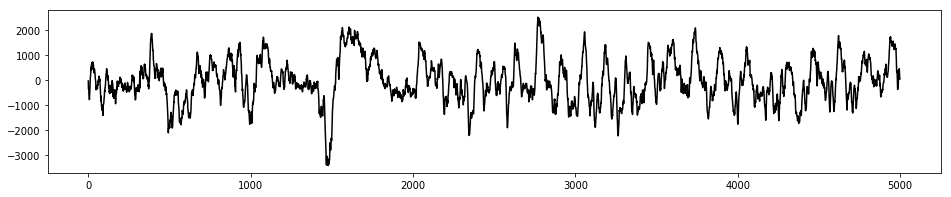

In [19]:
plt.figure(figsize=(16,3))
plt.plot(lfp[28000:33000], 'k')

# Calculate shape features

In [30]:
df = compute_features(lfp, row['Fs'], config_dict['f_range'],
                      center_extrema=config_dict['extrema_center'],
                      burst_detection_kwargs=config_dict['burst_kwargs_list'][0])
df.head()

/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/scott/anaconda/envs/shapyspiky/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Plot burst detection parameters

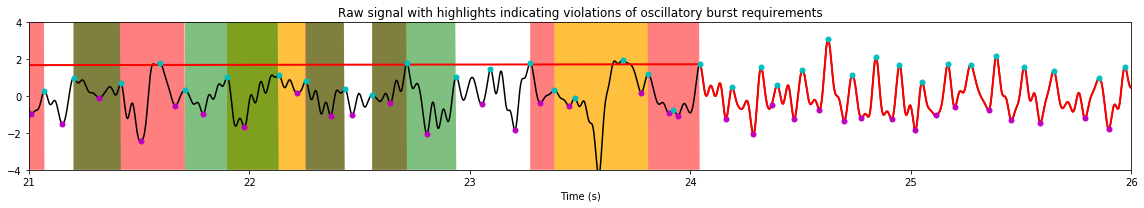

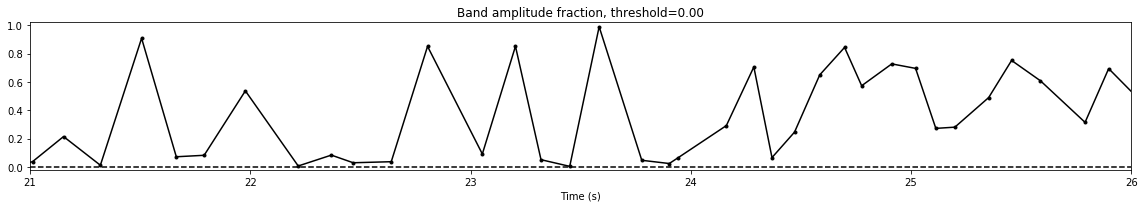

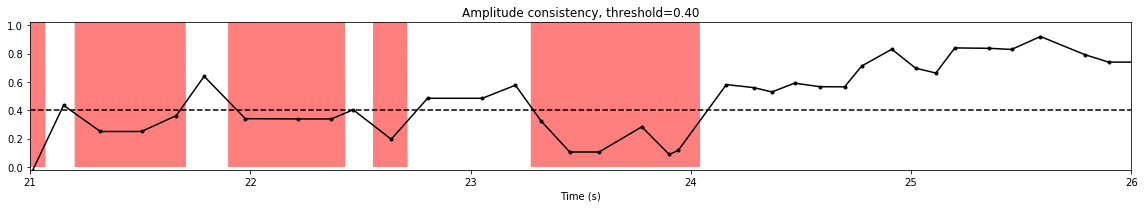

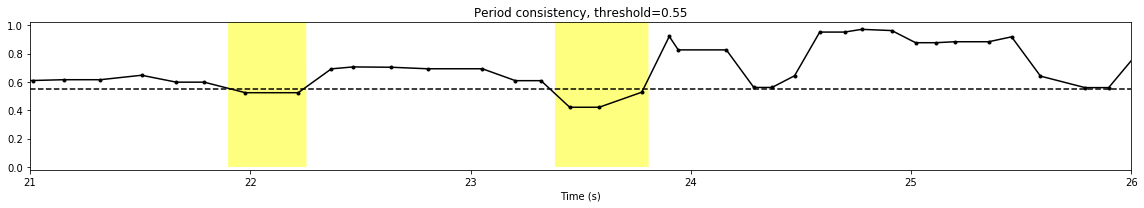

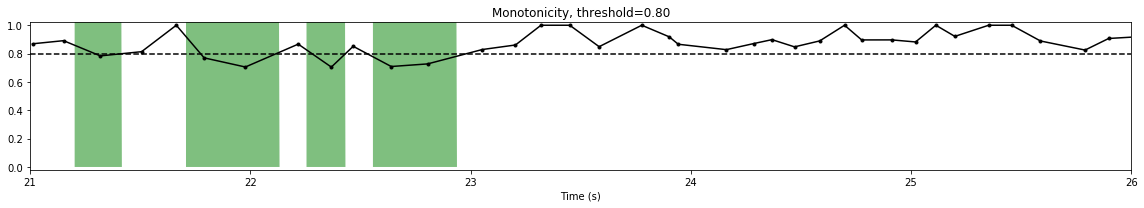

In [35]:
plot_burst_detect_params(lfp, row['Fs'], df, config_dict['burst_kwargs_list'][0], tlims=(21, 26))

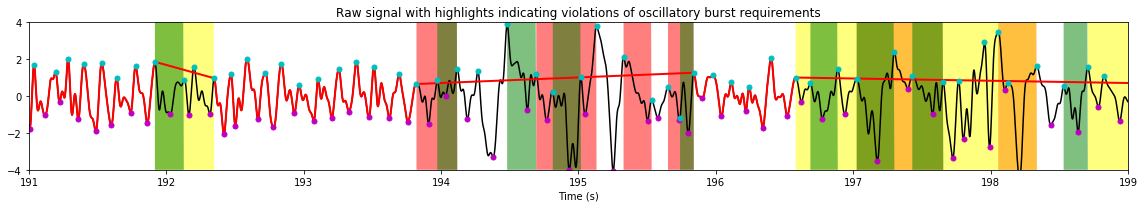

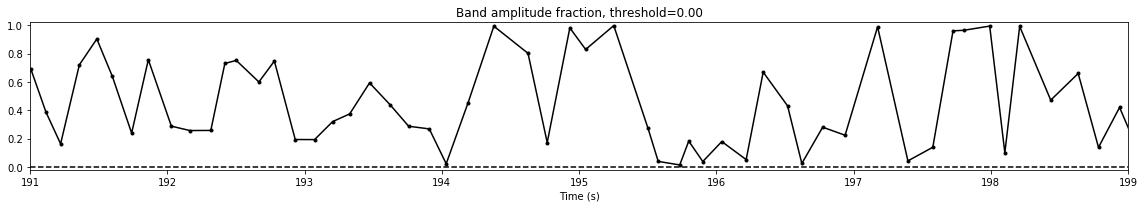

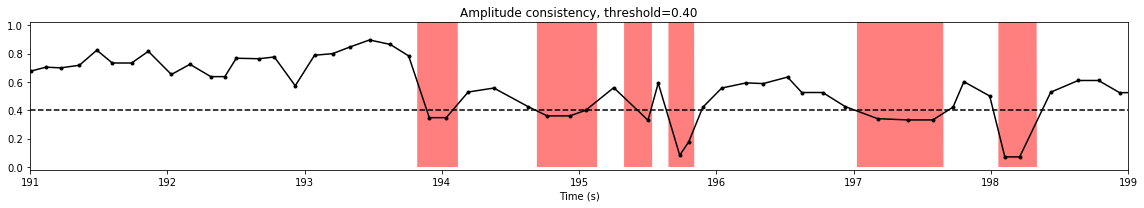

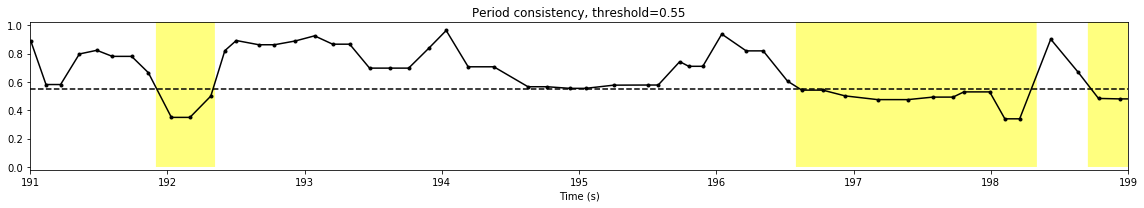

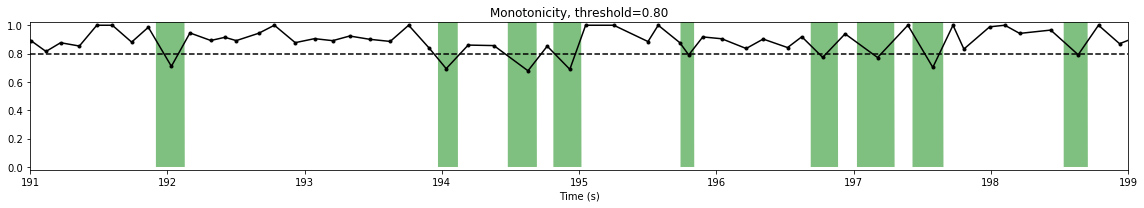

In [44]:
plot_burst_detect_params(lfp, row['Fs'], df, config_dict['burst_kwargs_list'][0], tlims=(191, 199))